In [1]:
from os import listdir
from os.path import exists, join, basename
import json

DATA_PATH = "../data"
OUTPUT_PATH = "../improved_output/output"
DATASETS= ["Deco", "FusTe"]


refined_data = {}
for dataset in DATASETS:
    refined_file_path = join(DATA_PATH, dataset, "refined.json")
    with open(refined_file_path) as f:
        refined_data[dataset] = json.load(f)
        
annotation_data = {}
for dataset in DATASETS:
    annotations_file_path = join(DATA_PATH, dataset, "annotations_elements.json")
    with open(annotations_file_path) as f:
        annotation_data[dataset] = json.load(f)

def get_experiment_paths(dataset, noise):
    d = join(OUTPUT_PATH, dataset, "ImprovedCrossValidationTraining")
    experiments = listdir(d)
    return [join(d, exp) for exp in experiments if has_noise(join(d, exp)) == noise]

def has_noise(experiment_path):
    config_file_path = join(
            experiment_path,   
            "config.json",
        )
    with open(config_file_path) as f:
        noise = json.load(f)["noise"]
    return bool(noise)

In [2]:
metrics = [
    "ndar",
    "nhar",
    "dp",
    "hp",
    "ioc",
    "ovh",
    "dahr",
    "avg_waec",
    "avg_waer",
    "ovr",
    "single_punish",
    "multi_punish",
]

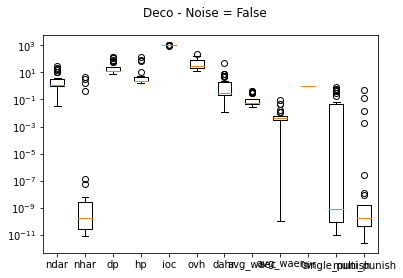

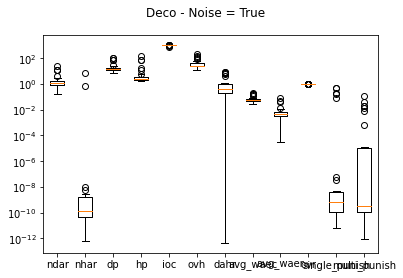

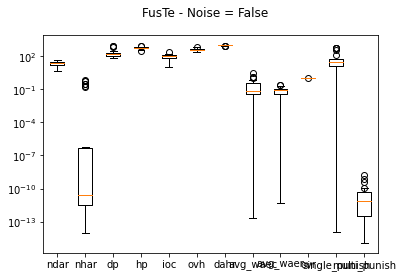

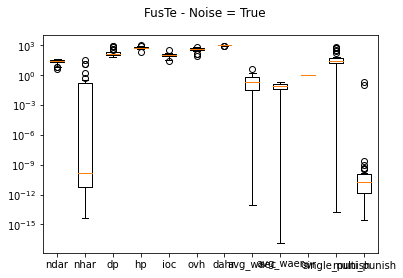

In [3]:
from pprint import pprint
import matplotlib.pyplot as plt


for dataset in DATASETS:
    for noise in [False, True]:
        experiment_weights = []
        for experiment in get_experiment_paths(dataset, noise):
            for fold_num in range(10):
                fold_weight_file = join(experiment, f"fold_{fold_num}", f"fold_{fold_num}_weights.json")
                with open(fold_weight_file) as f:
                    fold_weights = json.load(f)["weights"]
                experiment_weights.append(fold_weights)
        
        experiment_weights = list(zip(*experiment_weights))
        plt.boxplot(experiment_weights, labels=metrics)
        plt.yscale("log")
        plt.suptitle(f"{dataset} - Noise = {noise}")
        plt.show()